# Advanced Machine Learning  - PROJECT 1

In [1]:
import os
import matplotlib.pyplot as plt

from logRegClf import LogisticRegressionClf
from adam import AdamOptimizer
from iwls import IWLSOptimizer
from sgd import SGDOptimizer
from preprocessing import read_dataframe, preprocess_dataframe 

from sklearn.metrics import balanced_accuracy_score

In [2]:
def plot_convergence_analysis(df, df_name):

    X_train, X_test, y_train, y_test = preprocess_dataframe(df)

    iwls = IWLSOptimizer()
    clf_iwls = LogisticRegressionClf(iwls, consider_interactions=False)

    sgd = SGDOptimizer()
    clf_sgd = LogisticRegressionClf(sgd, consider_interactions=False)

    adam = AdamOptimizer()
    clf_adam = LogisticRegressionClf(adam, consider_interactions=False)

    clf_iwls.fit(X_train, y_train, epochs=500, patience=501)
    clf_sgd.fit(X_train, y_train, epochs=500, patience=501)
    clf_adam.fit(X_train, y_train, epochs=500, patience=501)

    pred_sgd = clf_sgd.predict(X_test)
    pred_adam = clf_adam.predict(X_test)
    pred_iwls = clf_iwls.predict(X_test)

    print('SGD accuracy: ', balanced_accuracy_score(y_test, pred_sgd))
    print('Adam accuracy: ', balanced_accuracy_score(y_test, pred_adam))
    print('IWLS accuracy: ', balanced_accuracy_score(y_test, pred_iwls))

    plt.figure(figsize=(9, 5))
    plt.title('Convergence analysis')
    plt.plot(range(0, 500), clf_sgd.log_loss_arr, label='SGD', color='magenta')
    plt.plot(range(0, 500), clf_adam.log_loss_arr, label='Adam', color='green')
    plt.plot(range(0, 500), clf_iwls.log_loss_arr, label='IWLS', color='cyan')

    plt.xlabel('Iterations')
    plt.ylabel('Log loss')
    ticks = range(0, 501, 50)
    plt.xticks(ticks)
    plt.legend()
    plt.savefig('convergence_all/{}.png'.format(df_name), bbox_inches='tight')
    plt.show()

In [3]:
file_list = []
for root, dirs, files in os.walk('datasets'):
    for file in files:
        file_list.append(os.path.join(root, file))

DATASET: bodyfat
---------------------------------
SGD accuracy:  0.6086956521739131
Adam accuracy:  0.5683229813664596
IWLS accuracy:  0.6513975155279503


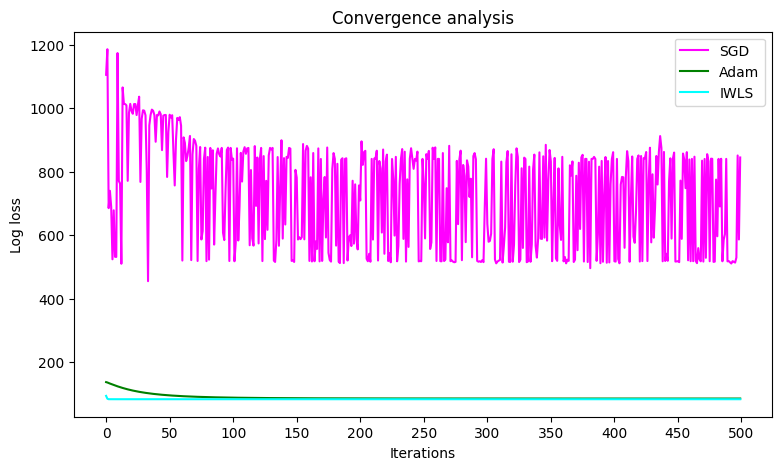

---------------------------------
DATASET: features
---------------------------------
SGD accuracy:  0.7693123938879457
Adam accuracy:  0.8387096774193548
IWLS accuracy:  0.8189728353140917


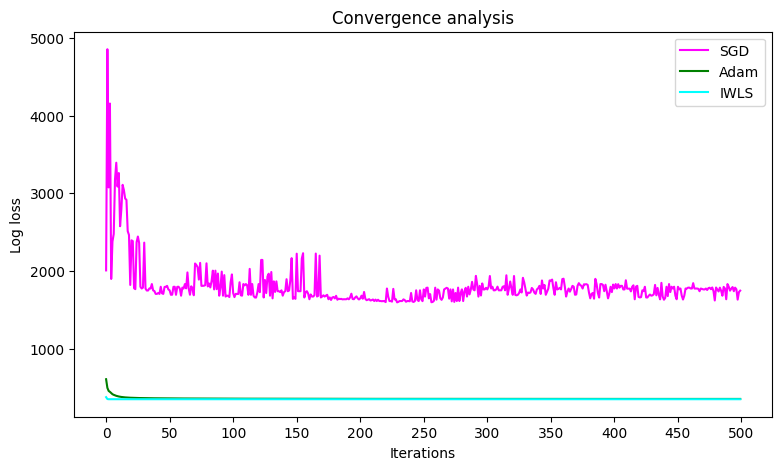

---------------------------------
DATASET: fri_c0_1000_25
---------------------------------
SGD accuracy:  0.8347012311079971
Adam accuracy:  0.8243919527574817
IWLS accuracy:  0.8243919527574817


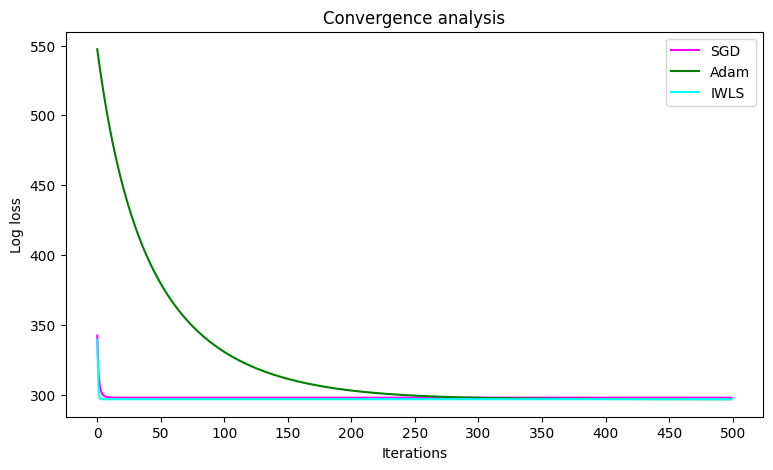

---------------------------------
DATASET: phpDQbeeh
---------------------------------
SGD accuracy:  0.625
Adam accuracy:  0.59
IWLS accuracy:  0.615


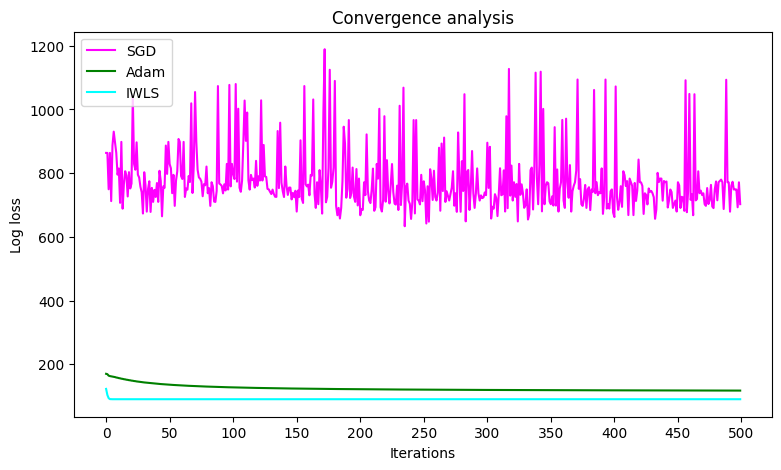

---------------------------------
DATASET: phpGUrE90
---------------------------------
SGD accuracy:  0.8290196078431372
Adam accuracy:  0.8708333333333333
IWLS accuracy:  0.867843137254902


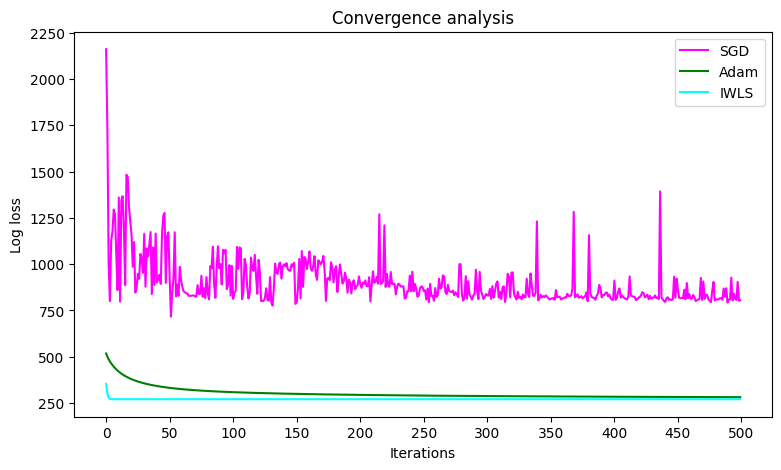

---------------------------------
DATASET: puma32H
---------------------------------
SGD accuracy:  0.5666629389398345
Adam accuracy:  0.6453164840080519
IWLS accuracy:  0.6482151643927533


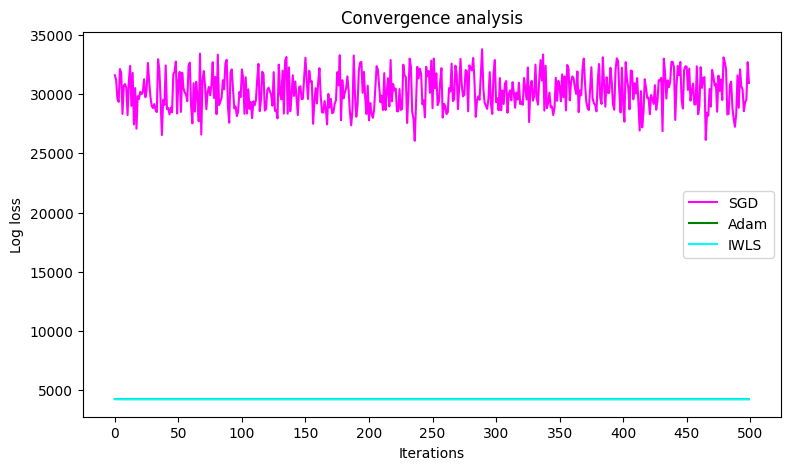

---------------------------------
DATASET: maternal_health_risk
---------------------------------
SGD accuracy:  0.5506097560975609
Adam accuracy:  0.6770833333333333
IWLS accuracy:  0.7267784552845529


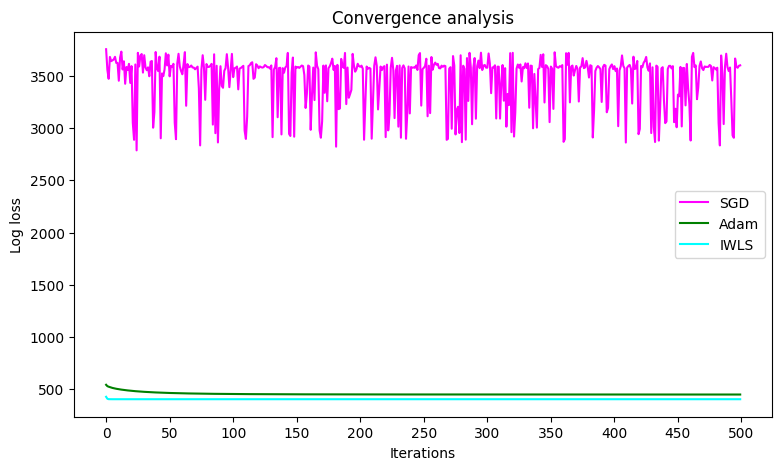

---------------------------------
DATASET: php8Mz7BG
---------------------------------
SGD accuracy:  0.7090596168378744
Adam accuracy:  0.6696140143997209
IWLS accuracy:  0.6680216577118229


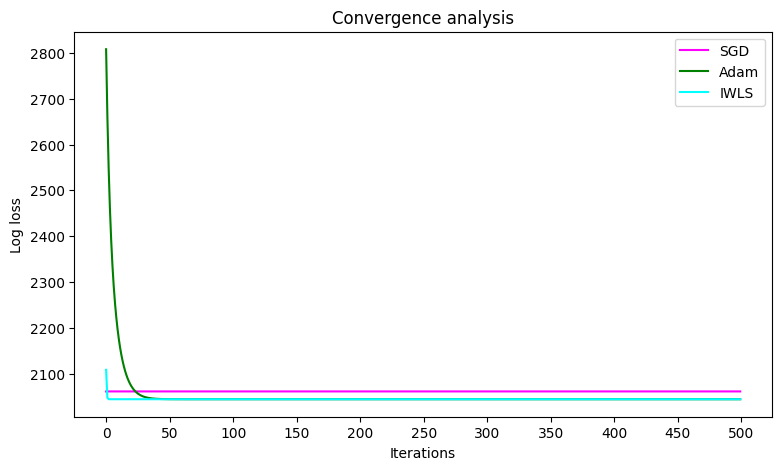

---------------------------------
DATASET: rice_cammeo_osmancik
---------------------------------
SGD accuracy:  0.5
Adam accuracy:  0.7432871012482662
IWLS accuracy:  0.8803814147018031


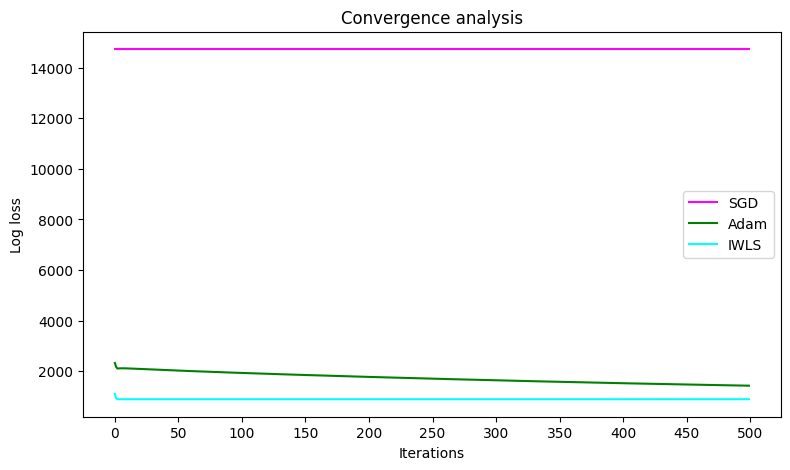

---------------------------------


In [4]:
for file in file_list:
    file_name = os.path.splitext(os.path.basename(file))[0]
    print(f'DATASET: {file_name}')
    print('---------------------------------')
    df = read_dataframe(file)
    plot_convergence_analysis(df, df_name=file_name)
    print('---------------------------------')